In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import h5py
import pandas as pd
from scipy import signal

In [2]:
path = 'data/los_20230321.001.h5'

lons = [19, 32]
lats = [59, 71]


In [3]:
def get_all(name):
   print(name)

with h5py.File(path, 'r') as f:
   #f.visit(get_all)

   print(f['Metadata']['Data Parameters'][()]) # type: ignore

[(b'YEAR', b'Year (universal time)', 0, b'y', b'Madrigal Hdf5 Prolog Parameters')
 (b'MONTH', b'Month (universal time)', 0, b'm', b'Madrigal Hdf5 Prolog Parameters')
 (b'DAY', b'Day (universal time)', 0, b'd', b'Madrigal Hdf5 Prolog Parameters')
 (b'HOUR', b'Hour (universal time)', 0, b'h', b'Madrigal Hdf5 Prolog Parameters')
 (b'MIN', b'Minute (universal time)', 0, b'm', b'Madrigal Hdf5 Prolog Parameters')
 (b'SEC', b'Second (universal time)', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'RECNO', b'Logical Record Number', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'KINDAT', b'Kind of data', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'KINST', b'Instrument Code', 0, b'N/A', b'Madrigal Hdf5 Prolog Parameters')
 (b'UT1_UNIX', b'Unix seconds (1/1/1970) at start', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'UT2_UNIX', b'Unix seconds (1/1/1970) at end', 0, b's', b'Madrigal Hdf5 Prolog Parameters')
 (b'PIERCE_ALT', b'Pierce Point Altitude', 0, b'km', b'Geographic Coordin

In [4]:
with h5py.File(path, 'r') as f:
    # Access the dataset
        
    dset = f['Data']['Table Layout']

    filtered_data = dset[(dset['gdlonr'] >= min(lons)) & (dset['gdlonr'] <= max(lons)) 
                         & (dset['gdlatr'] >= min(lats)) & (dset['gdlatr'] <= max(lats))]

    

In [5]:
len(filtered_data)

8085272

In [6]:
df = pd.DataFrame(filtered_data)

df['minute'] = df['min']
df['second'] = df['sec']
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
df = df[['datetime', 'gps_site', 'sat_id', 'gdlatr', 'gdlonr', 'los_tec', 'tec', 'azm', 'elm', 'gdlat', 'glon', 'gnss_type']]

df['slant_f'] = 1+16*(0.53-df['elm']/180)**3
df['vtec'] = df['los_tec']/df['slant_f']

df['id'] = df['gnss_type'].astype(str) + df['gps_site'].astype(str) + df['sat_id'].astype(str)

df

,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,id
0,2023-03-21 00:00:00,b'0ams',1,64.532524,19.349890,7.319108,6.757187,-93.695259,66.141273,64.409019,16.322577,b'GLONASS ',1.068718,6.848495,GLONASS 0ams1
1,2023-03-21 00:00:00,b'0ams',2,64.532524,19.349890,17.525944,6.324103,-95.240273,10.974367,61.708618,-3.123620,b'GLONASS ',2.650918,6.611274,GLONASS 0ams2
2,2023-03-21 00:00:00,b'0ams',3,64.532524,19.349890,5.837809,3.747042,127.889969,36.178402,61.966934,25.912123,b'GPS ',1.569827,3.718760,GPS 0ams3
3,2023-03-21 00:00:00,b'0ams',4,64.532524,19.349890,6.225074,5.995864,141.465408,73.560059,63.833977,20.586426,b'GPS ',1.028580,6.052107,GPS 0ams4
4,2023-03-21 00:00:00,b'0ams',6,64.532524,19.349890,7.118649,5.757795,-103.655869,51.757710,63.888821,14.246412,b'GPS ',1.228047,5.796722,GPS 0ams6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085267,2023-03-21 23:59:30,b'ylit',19,66.306602,23.667742,25.151558,11.009525,-9.048140,18.839087,73.481216,19.635979,b'GLONASS ',2.231186,11.272729,GLONASS ylit19
8085268,2023-03-21 23:59:30,b'ylit',26,66.306602,23.667742,12.014392,5.850308,75.738892,23.160782,67.073586,39.156425,b'GPS ',2.034241,5.906082,GPS ylit26
8085269,2023-03-21 23:59:30,b'ylit',28,66.306602,23.667742,22.285383,7.829966,35.898548,9.762112,73.973198,47.689735,b'GPS ',2.723060,8.183950,GPS ylit28
8085270,2023-03-21 23:59:30,b'ylit',29,66.306602,23.667742,23.818161,8.448826,10.967796,10.204763,76.757698,32.617683,b'GPS ',2.696479,8.833061,GPS ylit29


In [19]:
def calculate_time_diff(group):
    time_diff = group['datetime'].diff().dt.total_seconds()
    new_group = time_diff.gt(300).cumsum()
    group['kaari'] = new_group
    return group

# Apply the function to each group defined by the index
df = df.groupby('id').apply(calculate_time_diff)
df.reset_index(inplace=True, drop=True)
df

,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,id,kaari
0,2023-03-21 00:00:00,b'0ams',1,64.532524,19.349890,7.319108,6.757187,-93.695259,66.141273,64.409019,16.322577,b'GLONASS ',1.068718,6.848495,GLONASS 0ams1,0
1,2023-03-21 00:00:30,b'0ams',1,64.532524,19.349890,7.559455,7.005074,-93.473663,66.691986,64.417694,16.399038,b'GLONASS ',1.064910,7.098679,GLONASS 0ams1,0
2,2023-03-21 00:01:30,b'0ams',1,64.532524,19.349890,7.706900,7.154760,-93.358940,66.967659,64.422279,16.442909,b'GLONASS ',1.063058,7.249745,GLONASS 0ams1,0
3,2023-03-21 00:02:00,b'0ams',1,64.532524,19.349890,7.740303,7.198741,-93.241463,67.243530,64.426292,16.475420,b'GLONASS ',1.061240,7.293639,GLONASS 0ams1,0
4,2023-03-21 00:02:30,b'0ams',1,64.532524,19.349890,7.669321,7.158023,-92.997871,67.795799,64.434814,16.551697,b'GLONASS ',1.057707,7.250894,GLONASS 0ams1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085267,2023-03-21 23:57:00,b'ylit',9,66.306602,23.667742,9.515786,7.572054,-132.467819,50.392902,64.604004,19.501953,b'GPS ',1.250118,7.611908,GPS ylit9,2
8085268,2023-03-21 23:57:30,b'ylit',9,66.306602,23.667742,9.618620,7.675449,-132.512192,50.624043,64.611526,19.524801,b'GPS ',1.246285,7.717836,GPS ylit9,2
8085269,2023-03-21 23:58:00,b'ylit',9,66.306602,23.667742,9.746588,7.821429,-132.609863,51.090988,64.638084,19.597088,b'GPS ',1.238659,7.868658,GPS ylit9,2
8085270,2023-03-21 23:59:00,b'ylit',9,66.306602,23.667742,9.640309,7.757446,-132.659317,51.321877,64.656937,19.645588,b'GPS ',1.234948,7.806247,GPS ylit9,2


In [18]:
idlist = list(df['id'].unique())

df.loc[(df['id'] == idlist[3])]['kaari'].unique()
#df.to_csv('kaari2132023.csv')

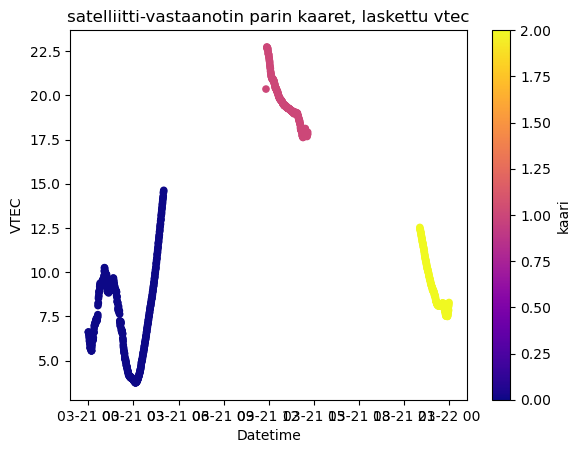

In [9]:
id = 10

df2 = df.loc[df['id'] == idlist[id]]

df2.plot('datetime', 'vtec', 'scatter', c='kaari', colormap='plasma')
plt.xlabel('Datetime')
plt.ylabel('VTEC')
plt.title('satelliitti-vastaanotin parin kaaret, laskettu vtec')
plt.show()

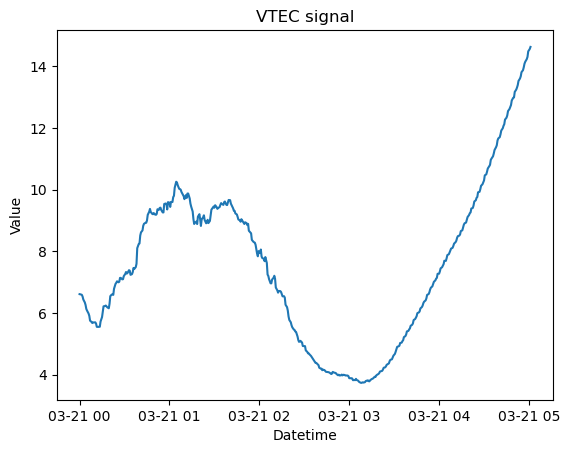

In [10]:
df3 = df2.loc[df2['kaari'] == 0]

# Plot both lines on the same plot
plt.plot(df3['datetime'], df3['vtec'], label='VTEC')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('VTEC signal')

# Show the plot
plt.show()


C:\Users\virtanem\AppData\Local\Temp\ipykernel_17796\845875872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['filtered'] = signal.savgol_filter(df3['tec'], window_length=60,


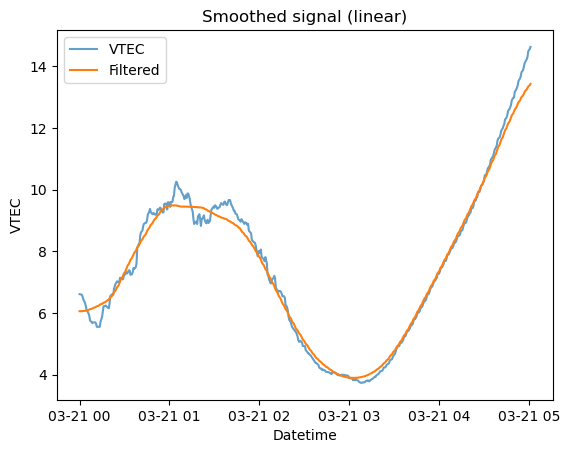

In [11]:
df3['filtered'] = signal.savgol_filter(df3['tec'], window_length=60, 
                                       polyorder=1, mode="nearest")

# Plot both lines on the same plot
plt.plot(df3['datetime'], df3['vtec'], alpha=0.7, label='VTEC')
plt.plot(df3['datetime'], df3['filtered'], label='Filtered')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('VTEC')
plt.legend()
plt.title('Smoothed signal (linear)')

# Show the plot
plt.show()

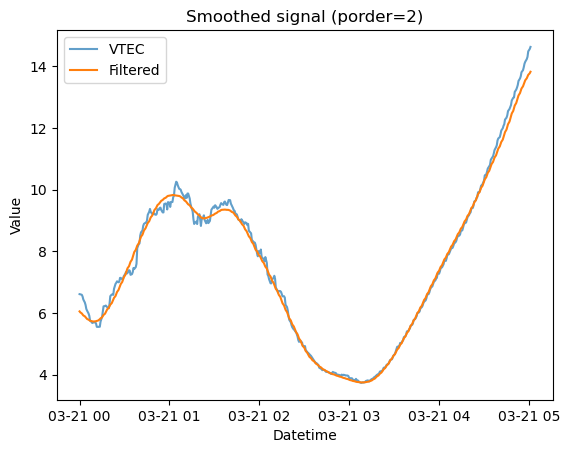

In [12]:
df4 = df3.copy()
df4['filtered'] = signal.savgol_filter(df4['tec'], window_length=60, 
                                       polyorder=2, mode="nearest")

# Plot both lines on the same plot
plt.plot(df3['datetime'], df4['vtec'], alpha=0.7, label='VTEC')
plt.plot(df3['datetime'], df4['filtered'], label='Filtered')

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()
plt.title('Smoothed signal (porder=2)')

# Show the plot
plt.show()

In [13]:
df3['blrmvd'] = df3['vtec'] - df3['filtered']

C:\Users\virtanem\AppData\Local\Temp\ipykernel_17796\3405999280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['blrmvd'] = df3['vtec'] - df3['filtered']


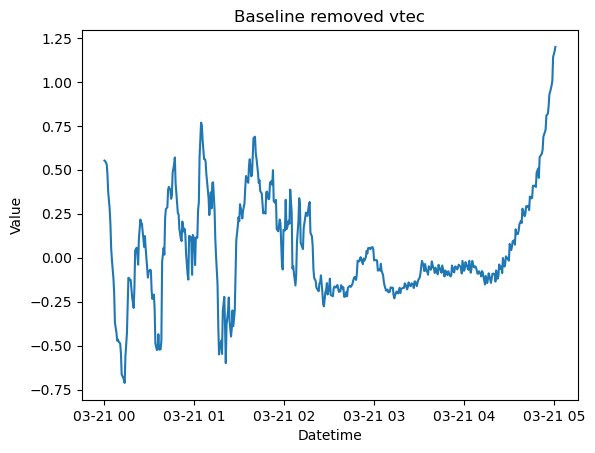

In [14]:
plt.plot(df3['datetime'], df3['blrmvd'])

# Add labels and legend
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.title('Baseline removed vtec')

# Show the plot
plt.show()

In [15]:
df3

,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,id,kaari,filtered,blrmvd
8083,2023-03-21 00:00:00,b'0ams',2,64.532524,19.34989,17.525944,6.324103,-95.240273,10.974367,61.708618,-3.123620,b'GLONASS ',2.650918,6.611274,GLONASS 0ams2,0,6.059172,0.552102
8084,2023-03-21 00:00:30,b'0ams',2,64.532524,19.34989,17.340984,6.321004,-95.008881,11.418018,61.842766,-2.725160,b'GLONASS ',2.625028,6.606019,GLONASS 0ams2,0,6.056705,0.549314
8085,2023-03-21 00:01:30,b'0ams',2,64.532524,19.34989,17.215683,6.307654,-94.892563,11.640464,61.908836,-2.524366,b'GLONASS ',2.612149,6.590620,GLONASS 0ams2,0,6.058475,0.532145
8086,2023-03-21 00:02:00,b'0ams',2,64.532524,19.34989,16.987740,6.256508,-94.775810,11.863313,61.964108,-2.370337,b'GLONASS ',2.599316,6.535466,GLONASS 0ams2,0,6.061206,0.474260
8087,2023-03-21 00:02:30,b'0ams',2,64.532524,19.34989,16.570150,6.167214,-94.541054,12.310185,62.093102,-1.963974,b'GLONASS ',2.573787,6.438043,GLONASS 0ams2,0,6.064060,0.373984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8547,2023-03-21 04:58:30,b'0ams',2,64.532524,19.34989,40.046619,13.651610,156.435593,8.277986,53.175159,27.351709,b'GLONASS ',2.814204,14.230175,GLONASS 0ams2,0,13.250421,0.979754
8548,2023-03-21 04:59:00,b'0ams',2,64.532524,19.34989,40.472805,13.732522,156.493423,8.033436,53.034805,27.400337,b'GLONASS ',2.829525,14.303748,GLONASS 0ams2,0,13.296493,1.007254
8549,2023-03-21 04:59:30,b'0ams',2,64.532524,19.34989,41.427296,13.929927,156.608475,7.545987,52.705379,27.518982,b'GLONASS ',2.860318,14.483456,GLONASS 0ams2,0,13.342027,1.141429
8550,2023-03-21 05:00:30,b'0ams',2,64.532524,19.34989,41.873543,14.018116,156.665314,7.300371,52.588150,27.554274,b'GLONASS ',2.875965,14.559824,GLONASS 0ams2,0,13.386235,1.173589


In [17]:
df.loc[df['id'] == idlist[id]]


,datetime,gps_site,sat_id,gdlatr,gdlonr,los_tec,tec,azm,elm,gdlat,glon,gnss_type,slant_f,vtec,id,kaari
8083,2023-03-21 00:00:00,b'0ams',2,64.532524,19.34989,17.525944,6.324103,-95.240273,10.974367,61.708618,-3.123620,b'GLONASS ',2.650918,6.611274,GLONASS 0ams2,0
8084,2023-03-21 00:00:30,b'0ams',2,64.532524,19.34989,17.340984,6.321004,-95.008881,11.418018,61.842766,-2.725160,b'GLONASS ',2.625028,6.606019,GLONASS 0ams2,0
8085,2023-03-21 00:01:30,b'0ams',2,64.532524,19.34989,17.215683,6.307654,-94.892563,11.640464,61.908836,-2.524366,b'GLONASS ',2.612149,6.590620,GLONASS 0ams2,0
8086,2023-03-21 00:02:00,b'0ams',2,64.532524,19.34989,16.987740,6.256508,-94.775810,11.863313,61.964108,-2.370337,b'GLONASS ',2.599316,6.535466,GLONASS 0ams2,0
8087,2023-03-21 00:02:30,b'0ams',2,64.532524,19.34989,16.570150,6.167214,-94.541054,12.310185,62.093102,-1.963974,b'GLONASS ',2.573787,6.438043,GLONASS 0ams2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8985,2023-03-21 23:57:00,b'0ams',2,64.532524,19.34989,8.454553,7.694876,-94.167633,64.145187,64.382912,16.037407,b'GLONASS ',1.083763,7.801107,GLONASS 0ams2,2
8986,2023-03-21 23:57:30,b'0ams',2,64.532524,19.34989,8.506654,7.757978,-94.030106,64.417839,64.388756,16.081667,b'GLONASS ',1.081590,7.864952,GLONASS 0ams2,2
8987,2023-03-21 23:58:00,b'0ams',2,64.532524,19.34989,8.699689,7.965647,-93.746223,64.963577,64.399658,16.157574,b'GLONASS ',1.077354,8.075051,GLONASS 0ams2,2
8988,2023-03-21 23:59:00,b'0ams',2,64.532524,19.34989,8.797118,8.070624,-93.599686,65.236633,64.404762,16.189451,b'GLONASS ',1.075291,8.181152,GLONASS 0ams2,2
